# CMSE 802 Pre-class assignment: Matrix Solver for 2D PDEs
## Date: 09/13/2018
## Due: 09/17/2018; 10:30 PM

### The goal of this assignment is to extend our matrix solver to solve PDEs in 2D cases.

---
### Your name:

### Part 1: Linear Matrix equation for 2D PDEs
As in the example of 1D Laplace equation, a PDE can be converted to a matrix equation via discretization. 

### <font color=red>Watch the video clip  (2D_FDM_PDE_v1.mp4) provided with this assignment.</font>

Here, we use a simply 2D grid system to demonstrate how to construct the matrix equation. The domain is discretized into 3 rows and 4 columns, and the grid points at which the unkown needs to be solved are marked by red circles. There are totally 12 grid points. These grid points are labeled by 0, 1, 2, ...., and 11. See the illustation below. 

<img src="2D-discr-2.png",width=500, height=500 />

The boundary condition are given as the following. The boundary value is 10 at the left boundary, 1 at the right boundary, and 15 at the top boundary. The bottom boundary is no-flux.

**Recall that, in 1D finite difference method, the 2nd derivative is **

$$ f''(x_0) = \frac{(f(x_0 + h)-f(x_0))-(f(x_0)-f(x_0-h))}{h^2}.$$


For the Laplace equation in 2D

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0,$$ 

let's check the stencil for grid 0. Here, for simplicity, we assume that $\Delta x = \Delta y.$

$$ \frac{(u_{4} - u_{0}) -( u_{0} - u_{0})}{(\Delta x)^2} + \frac{(u_{1} - u_{0}) - (u_{0} - 10)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ -3 u_0 + u_1 + u_4 = -10,$$

where $(u_0 - u_0)$ in the numerator of the first term results from the no-flux boundary condition between grid 0 and the green circle below it, and $(u_0 - 10)$ in the numerator of the second term is for the boundary value at the cyan circle left to grid 0.

Now, let's write the stencil for grid 0 into a matrix-vector form. We obtain

$$\left[ \begin{array}{ccccccccccc} 
-3 &  1 &  0 &  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array} \right] 
\left[ \begin{array}{c} u_0 \\ u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\ u_7 \\ u_8 \\ u_9 \\ u_{10} \\ u_{11}  \end{array} \right] = 
\left[ \begin{array}{c} -10 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0  \end{array} \right]
$$

Let's work on the stencils for grids 1 through 3. For grid 1, we obtain

$$\frac{(u_{5} - u_{1}) -( u_{1} - u_{1})}{(\Delta x)^2} + \frac{(u_{2} - u_{1}) - (u_{1} - u_{0})}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_0 -3 u_1 + u_2 + u_5 = 0.$$

For grid 2, we obtain

$$\frac{(u_{6} - u_{2}) -( u_{2} - u_{2})}{(\Delta x)^2} + \frac{(u_{3} - u_{2}) - (u_{2} - u_{1})}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_1 -3 u_2 + u_3 + u_6 = 0.$$

For grid 3, we obtain

$$\frac{(u_{7} - u_{3}) -( u_{3} - u_{3})}{(\Delta x)^2} + \frac{(1 - u_{3}) - (u_{3} - u_{2})}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_2 -3 u_3 + u_7 = -1.$$

Next, we add the stencils into the matrix equation for grids 1, 2, and 3. We obtain

$$\left[ \begin{array}{ccccccccccc} 
-3 &  1 &  0 &  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 1 & -3 &  1 &  0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 &  1 & -3 &  1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 0 &  0 &  1 & -3 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 
\end{array} \right] 
\left[ \begin{array}{c} u_0 \\ u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\ u_7 \\ u_8 \\ u_9 \\ u_{10} \\ u_{11}  \end{array} \right] = 
\left[ \begin{array}{c} -10 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0  \end{array} \right]
$$


For grids 4 through 7, the stencils are

$$\frac{(u_{8} - u_{4}) -( u_{4} - u_{0})}{(\Delta x)^2} + \frac{(u_{5} - u_{4}) - (u_{4} - 10)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_0 -4 u_4 + u_5 + u_8 = -10,$$

$$\frac{(u_{9} - u_{5}) -( u_{5} - u_{1})}{(\Delta x)^2} + \frac{(u_{6} - u_{5}) - (u_{5} - u_4)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_1 + u_4 -4 u_5 + u_6 + u_9 = 0,$$

$$\frac{(u_{10} - u_{6}) -( u_{6} - u_{2})}{(\Delta x)^2} + \frac{(u_{7} - u_{6}) - (u_{6} - u_5)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_2 + u_5 -4 u_6 + u_7 + u_{10} = 0,$$

$$\frac{(u_{11} - u_{7}) -( u_{7} - u_{3})}{(\Delta x)^2} + \frac{(1 - u_{7}) - (u_{7} - u_6)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_3 + u_6 - 4 u_7 + u_{11}  = -1,$$

respectively. Incoporating these equations to the matrix equation, we obtain

$$\left[ \begin{array}{cccccccccccc} 
-3 &  1 &  0 &  0 & 1 &  0 &  0 &  0 & 0 & 0 & 0 & 0 \\
 1 & -3 &  1 &  0 & 0 &  1 &  0 &  0 & 0 & 0 & 0 & 0 \\
 0 &  1 & -3 &  1 & 0 &  0 &  1 &  0 & 0 & 0 & 0 & 0 \\
 0 &  0 &  1 & -3 & 0 &  0 &  0 &  1 & 0 & 0 & 0 & 0 \\
 1 &  0 &  0 & 0 & -4 &  1 &  0 &  0 & 1 & 0 & 0 & 0 \\
 0 &  1 &  0 & 0 &  1 & -4 &  1 &  0 & 0 & 1 & 0 & 0 \\
 0 &  0 &  1 & 0 &  0 &  1 & -4 &  1 & 0 & 0 & 1 & 0 \\
 0 &  0 &  0 & 1 &  0 &  0 &  1 & -4 & 0 & 0 & 0 & 1 \\
\end{array} \right] 
\left[ \begin{array}{c} u_0 \\ u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\ u_7 \\ u_8 \\ u_9 \\ u_{10} \\ u_{11}  \end{array} \right] = 
\left[ \begin{array}{c} -10 \\ 0 \\ 0 \\ -1 \\ -10 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0  \end{array} \right].
$$

Next, for grids 8 throuhg 11, the stencils are

$$\frac{(15 - u_{8}) -( u_{8} - u_{4})}{(\Delta x)^2} + \frac{(u_{9} - u_{8}) - (u_{8} - 10)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_4 -4 u_8 + u_9 = -15 - 10 = -25,$$

$$\frac{(15 - u_{9}) -( u_{9} - u_{5})}{(\Delta x)^2} + \frac{(u_{10} - u_{9}) - (u_{9} - u_{8})}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_5 + u_8 -4 u_9 + u_{10} = -15,$$

$$\frac{(15 - u_{10}) -( u_{10} - u_{6})}{(\Delta x)^2} + \frac{(u_{11} - u_{10}) - (u_{10} - u_9)}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_6 + u_9 - 4 u_{10} +  u_{11} = -15,$$

$$\frac{(15 - u_{11}) -( u_{11} - u_{7})}{(\Delta x)^2} + \frac{(1 - u_{11}) - (u_{11} - u_{10})}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ u_7 + u_{10} -4 u_{11}  = -15-1 = -16,$$

respectively. Finally, the matrix equation is 

$$\left[ \begin{array}{cccccccccccc} 
-3 &  1 &  0 &  0 &  1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
 1 & -3 &  1 &  0 &  0 &  1 &  0 &  0 &  0 &  0 &  0 &  0 \\
 0 &  1 & -3 &  1 &  0 &  0 &  1 &  0 &  0 &  0 &  0 &  0 \\
 0 &  0 &  1 & -3 &  0 &  0 &  0 &  1 &  0 &  0 &  0 &  0 \\
 1 &  0 &  0 &  0 & -4 &  1 &  0 &  0 &  1 &  0 &  0 &  0 \\
 0 &  1 &  0 &  0 &  1 & -4 &  1 &  0 &  0 &  1 &  0 &  0 \\
 0 &  0 &  1 &  0 &  0 &  1 & -4 &  1 &  0 &  0 &  1 &  0 \\
 0 &  0 &  0 &  1 &  0 &  0 &  1 & -4 &  0 &  0 &  0 &  1 \\
 0 &  0 &  0 &  0 &  1 &  0 &  0 &  0 & -4 &  1 &  0 &  0 \\
 0 &  0 &  0 &  0 &  0 &  1 &  0 &  0 &  0 & -4 &  1 &  0 \\
 0 &  0 &  0 &  0 &  0 &  0 &  1 &  0 &  0 &  1 & -4 &  1 \\
 0 &  0 &  0 &  0 &  0 &  0 &  0 &  1 &  0 &  0 &  1 & -4
\end{array} \right] 
\left[ \begin{array}{c} u_0 \\ u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\ u_7 \\ u_8 \\ u_9 \\ u_{10} \\ u_{11}  \end{array} \right] = 
\left[ \begin{array}{c} -10 \\ 0 \\ 0 \\ -1 \\ -10 \\ 0 \\ 0 \\ -1 \\ -25 \\ -15 \\ -15 \\ -16  \end{array} \right].
$$

**Observe the code below, which is used to contruct the operator matrix for 2D Laplace equation described above. The grid system is shown in the figure earlier, with boundary conditions on the 4 sides of the domain. There are 4 columns and 3 rows of grid points, and there are labeled from 0 to 11.  Write your explanation of what each part of the code is doing.**

[[-3.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -3.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -3.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -3.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.]]
[-10.   0.   0.  -1. -10.   0.   0.  -1. -25. -15. -15. -16.]


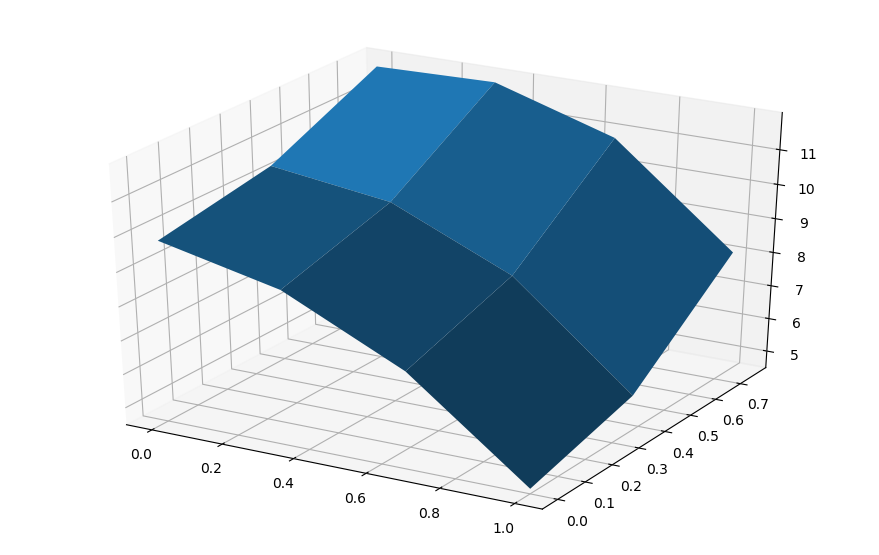

In [2]:
# load libraries
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# spatial discretization in 2D
nx = 4    # <== 4 columns
x = np.linspace(0, 1, nx)

ny = 3    # <== 3 rows 
y = np.linspace(0, 0.75, ny)

# create meshgrid (x and y coordinate of grid points in the 2D grid system) 
xmsh, ymsh = np.meshgrid(x, y)


# create a table to record the row and column indices of each grid point
cnt = 0
GP_RwCln = np.zeros((3*4,3))

for row in range(3):
    for column in range(4):
        
        GP_RwCln[cnt,0] = cnt  # <== label of grid points
        GP_RwCln[cnt,1] = row
        GP_RwCln[cnt,2] = column
        
        cnt = cnt + 1
# GP_RwCln is the table, in which the 1st column is the label of grid point
# the 2nd and 3rd columns are the indices of row and column of grid points in the discretization.

# print (GP_RwCln)
# create operator matrix and force vector    
Am = np.zeros((3*4,3*4)) # <== 12 x 12 matrix, because there are 12 grid points
f = np.zeros(3*4)        # <== 12 entities in the force vector because there are 12 grid points

# fill the entries in the matrix and force vector
for i in range(3*4):  

    
    # entries on the main diagonal
    Am[i,i] = -4
    

    # What are the next two lines doing? Answer:   assign values to points from second column
    if GP_RwCln[i,2] > 0 :
        Am[i,i-1] = 1.0
    
    # What are the next two lines doing? Answer:   assign values to points up to second column from the last
    if GP_RwCln[i,2] < 3 :
        Am[i,i+1] = 1.0
       
    # What are the next two lines doing? Answer:   assign values to points with no-flux boundary condition
    if GP_RwCln[i,1] == 0:
        Am[i,i] = -3.0
        
    # What are the next two lines doing? Answer:   assign values to points from second row
    if GP_RwCln[i,1] > 0 :
        Am[i,i-(nx)] = 1.0       
    
    # What are the next two lines doing? Answer:   assign values to points up to secon
    if GP_RwCln[i,1] < 2 :
        Am[i,i+(nx)] = 1.0        

        
    # What are the next two lines doing? Answer:   assign values to force vector where the points near the uppermost side
    if GP_RwCln[i,1] == 2:
        f[i] = f[i] - 15.
    
    # What are the next two lines doing? Answer:   assign values to force vector where the points near left most 
    if GP_RwCln[i,2] == 0:
        f[i] = f[i] - 10. 
    
    # What are the next two lines doing? Answer:   assign values to force vector where the points near right most
    if GP_RwCln[i,2] == 3:
        f[i] = f[i] - 1. 

            
# print the operator matrix and force vector constructed.    
print(Am)
print(f)


# solve vector u_vec
u_vec = np.linalg.solve(Am, f)
# print(x)

# map the vector of x to the 2D grid system according to the indices of row and column
u_2d = np.zeros((3,4))
for i in range(3*4):
    u_2d[int(GP_RwCln[i,1]),int(GP_RwCln[i,2])] = u_vec[i]
    
# print(u_2d)  


fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(xmsh,ymsh,u_2d)
plt.show()
# ax.set_zlim3d(0,15)


**Now, we want to increase the spatial resolution by 4, meaning increasing number of grid points to be 4 times the original ones in the x and y directions.** We should reconstruct the matrix equation for the new discretization. The code above is copied to new cell. Fill the blank and make the code work. 

[[-3.  1.  0. ...  0.  0.  0.]
 [ 1. -3.  1. ...  0.  0.  0.]
 [ 0.  1. -3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]
[-10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  -1. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  -1. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  -1. -10.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  -1. -10.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1. -10.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1. -10.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.
 -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  -1. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  -1. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  

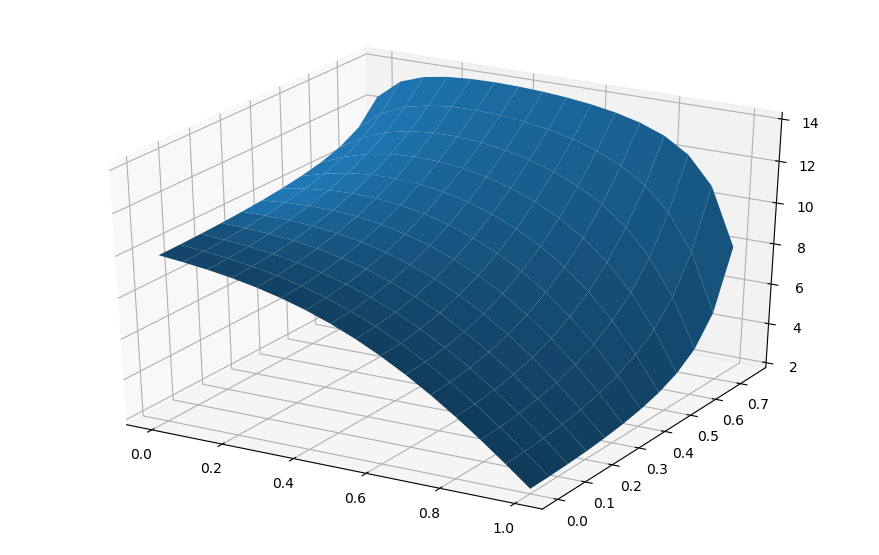

In [4]:
# load libraries
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# spatial discretization in 2D
nx = 16  # <== 16 columns of grid points
x = np.linspace(0, 1, nx)

ny = 12  # <== 12 rows of grid points
y = np.linspace(0, 0.75, ny)


# create meshgrid (x and y coordinate of grid points in the 2D grid system) 
xmsh, ymsh = np.meshgrid(x, y)


# create a table to record the row and column indices of each grid point
cnt = 0
GP_RwCln = np.zeros((12*16,3))

for row in range(12):
    for column in range(16):
        
        GP_RwCln[cnt,0] = cnt
        GP_RwCln[cnt,1] = row
        GP_RwCln[cnt,2] = column
        
        cnt = cnt + 1
# GP_RwCln is the table, in which the 1st column is the label of grid point
# the 2nd and 3rd columns are the indices of row and column of grid points in the discretization.


# create operator matrix and force vector    
Am = np.zeros((12*16,12*16))  # <== fill the blank
f = np.zeros(12*16)    # <== fill the blank

# fill the entries in the matrix and force vector
for i in range(12*16):    # <== fill the blank

    
    # entries on the main diagonal
    Am[i,i] = -4.0
    

    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,2] > 0 :
        Am[i,i-1] = 1.0
    
    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,2] < 15  :    # <== fill the blank
        Am[i,i+1] = 1.0
       
    # what the next two lines are doing? Answer: For points at the bottom row, the coefficients are 
    # changed to -3 due to the no-flux boundary condition.
    if GP_RwCln[i,1] == 0:    # <== fill the blank
        Am[i,i] = -3.0
        
    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,1] > 0 :
        Am[i,i-(nx)] = 1.0       
    
    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,1] < 11  :    # <== fill the blank
        Am[i,i+(nx)] = 1.0        

        
    # What are the next two lines doing? Answer: For points at top row, the boundary values are moved to
    # the force vector.
    if GP_RwCln[i,1] == 11:
        f[i] = f[i] - 15         # <== fill the blank
    
    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,2] == 0:
        f[i] = f[i] - 10. 
    
    # What are the next two lines doing? Answer: (No need to write again if you have done it in the previous cell)
    if GP_RwCln[i,2] == 15:
        f[i] = f[i] - 1       # <== fill the blank

            
# print the operator matrix and force vector constructed.    
print(Am)
print(f)


# solve vector u_vec
u_vec = np.linalg.solve(Am, f)
# print(x)

# map the vector of x to the 2D grid system according to the indices of row and column
u_2d = np.zeros((12,16))
for i in range(12*16):
    u_2d[int(GP_RwCln[i,1]),int(GP_RwCln[i,2])] = u_vec[i]
    
# print(u_2d)  


fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(xmsh,ymsh,u_2d)
plt.show()


### Assignment wrap-up

What questions do you have, if any, about any of the topics discussed in this assignment.

**Put your answer here!** no

Do you have any further questions or comments about this material?

**Put your answer here!** no

### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20180918, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!